
# Introduction to Regularization


## Learning Objectives

1. Describe what a loss function is.
2. Define regularization.
3. Describe and differentiate LASSO and Ridge regularization.
4. Understand how regularization affects the bias-variance tradeoff.
5. Implement LASSO regression and Ridge regression.

## Overview of regularization

---

**Regularizing** regression models is to:
- **automatically** avoid overfitting 
- **while** we fit our model
- by adding a "penalty" to our loss function.

### Before regularziation (OLS):

$$
\begin{align}
\text{minimize: MSE} &= \textstyle\frac{1}{n}\sum (y_i - \hat{y}_i)^2 \\ \\
                     &= \textstyle\frac{1}{n}\|\mathbf{y} - \hat{\mathbf{y}}\|^2 \\ \\
                     &= \textstyle\frac{1}{n}\|\mathbf{y} - \mathbf{X\beta}\|^2
\end{align}
$$

### After regularization (Ridge):

$$
\begin{align}
\text{minimize: MSE + penalty} &= \textstyle\frac{1}{n}\sum (y_i - \hat{y}_i)^2 + \alpha \sum \beta_j^2 \\ \\
                               &= \textstyle\frac{1}{n}\|\mathbf{y} - \hat{\mathbf{y}}\|^2 + \alpha \|\beta\|^2 \\ \\
                               &= \textstyle\frac{1}{n}\|\mathbf{y} - \mathbf{X}\hat{\beta}\|^2 + \alpha \|\beta\|^2
\end{align}
$$

Adding this penalty term onto the end and then minimizing has a similar effect to the one described above. That is, **ridge regression shrinks our regression coefficients closer to zero to make our model simpler**. We are accepting more bias in exchange for decreased variance. We'll be tasked with picking the "best" $\alpha$ that optimizes this bias-variance tradeoff.

### Other Variations

| Name | Loss Function |
| --- | --- |
| OLS | MSE |
| Ridge Regression | MSE + $\alpha\|\beta\|^2_2$ |
| LASSO Regression | MSE + $\alpha\|\beta\|_1$ |
| $L_q$-Regression | MSE + $\alpha\|\beta\|^q_q$ |

### Sidenote on notation:
We'll be using $\alpha$ to denote our **regularization parameter**, since that's what Scikit-Learn uses. However, this is contrary to data science literature. It is normally denoted with a $\lambda$. Why? Only Google knows.



## What is the effect of regularization?

---

**To demonstrate the effects of regularization, we will be using a dataset on wine quality.**

### Load the wine .csv

This version has red and white wines concatenated together and tagged with a binary 1/0 indicator (1 is red wine). There are many other variables purportedly related to the rated quality of the wine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# Load in the wine .csv.
wine = pd.read_csv('datasets/winequality_merged.csv')

# Convert all columns to lowercase and replace spaces in column names.
wine.columns = wine.columns.str.lower().str.replace(' ', '_')

In [3]:
# Check the first five rows.
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# How big is this dataset?
wine.shape

(6497, 13)

In [5]:
# Check for missing values.
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Create X and y.
X = wine.drop(columns = 'quality')
y = wine['quality']

# Instantiate our PolynomialFeatures object to create all two-way terms.
pfeats = PolynomialFeatures(interaction_only=True)



In [7]:
# Check out the dimensions of X_overfit.


#### Let's split our data up into training and testing sets. Why do we split our data into training and testing sets?

In [8]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

In [9]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
X_train_poly = pfeats.fit_transform(X_train)
X_test_poly = pfeats.transform(X_test)

In [10]:
X_train.shape, X_train_poly.shape

((4872, 12), (4872, 79))

In [11]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
2225,7.6,0.56,0.12,10.4,0.096,22.0,177.0,0.9983,3.32,0.45,9.1,0
2056,7.1,0.21,0.27,8.6,0.056,26.0,111.0,0.9956,2.95,0.52,9.5,0
5172,7.8,0.31,0.40,1.6,0.027,20.0,87.0,0.9911,3.15,0.48,11.9,0
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,1
895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7,1


In [11]:
# pfeats.get_feature_names_out()

In [12]:
#OneHotEncoder, StandardScaler, PolynomialFeatures

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train_poly)
Z_test = scaler.transform(X_test_poly)

In [15]:
print(Z_train)

[[ 0.          0.30145367  1.33470141 ... -0.88289816 -0.55406167
  -0.57111605]
 [ 0.         -0.08331023 -0.78700463 ... -0.37698247 -0.55406167
  -0.57111605]
 [ 0.          0.45535923 -0.1808029  ...  0.08522689 -0.55406167
  -0.57111605]
 ...
 [ 0.         -0.39112135  0.72849969 ... -0.06804461 -0.55406167
  -0.57111605]
 [ 0.         -0.92979081 -0.36266342 ...  0.26843423 -0.55406167
  -0.57111605]
 [ 0.          1.37879259 -0.60514411 ... -0.81045343 -0.55406167
  -0.57111605]]


In [12]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (4872, 79)
y_train shape is: (4872,)
Z_test shape is: (1625, 79)
y_test shape is: (1625,)


## Standardizing predictors is required

Let's remind ourselves of our new loss function:

$$MSE + \alpha \|\beta\|^2$$



## But First: OLS

In [13]:
# Import the appropriate library and fit our OLS model.
from sklearn.linear_model import LinearRegression, Ridge

In [14]:
ols = LinearRegression().fit(Z_train, y_train)

In [15]:
# How does the model score on the training and test data?
print(f"Training R-Squared: {ols.score(Z_train, y_train)}")
print(f"Testing R-Squared: {ols.score(Z_test, y_test)}")

Training R-Squared: 0.3668500082052494
Testing R-Squared: 0.05886514538476861


(THREAD) What do these $R^2$s tell you?

## And Now: Ridge

### Let's think about this...

$$ \|\mathbf{y} - \mathbf{X}\beta\|^2 + \alpha\|\beta\|^2 $$

<details><summary>What's the optimal value of $\beta$ when $\alpha = 0$?</summary>
Our problem reduces to OLS, so it's the good old fashioned OLS solution! 
</details>

<details><summary>What's the optimal value of $\beta$ when $\alpha = \infty$?</summary>
Anything besides $\hat{\beta} = \mathbf{0}$ will cause our whole loss function to be $\infty$. So, it must be that $\hat{\beta} = \mathbf{0}$!
</details>

<details><summary>Some facts...</summary>
$\alpha$ is a constant for the *strength* of the regularization parameter. The higher the value, the greater the impact of this new component in the loss function. If the value was zero, we would revert back to just the least squares loss function. If the value was a billion, however, the residual sum of squares component would have a much smaller effect on the loss/cost than the regularization term.
</details>

### Ok, so which $\alpha$ is best?

We'll primarily choose the optimal $\alpha$ via **cross validation**.

In [19]:
# Ridge regressor lives here:
from sklearn.linear_model import Ridge

In [26]:
# Instantiate.
ridge = Ridge(alpha=2.0).fit(Z_train, y_train)
ridge2 = Ridge(alpha=1.0).fit(Z_train, y_train)
# Fit.


# Evaluate model using R2.
print(f"Ridge Training R-Squared: {ridge.score(Z_train, y_train)}")
print(f"Ridge Testing R-Squared: {ridge.score(Z_test, y_test)}")

print(f"Ridge2 Training R-Squared: {ridge2.score(Z_train, y_train)}")
print(f"Ridge2 Testing R-Squared: {ridge2.score(Z_test, y_test)}")

Ridge Training R-Squared: 0.35748205299999514
Ridge Testing R-Squared: 0.31923716182377115
Ridge2 Training R-Squared: 0.35881375070160204
Ridge2 Testing R-Squared: 0.3177926724773872


(THREAD) What do these $R^2$s tell you?

## Brute-forcing the answer

In [17]:
from sklearn.linear_model import RidgeCV

In [33]:
# 20 numbers, evenly spaced between 0 and 10
ridge_cv = RidgeCV(alphas = np.arange(0.5, 10, .5))
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5]))

In [37]:
ridge_cv.alpha_

0.5

In [21]:
# 20 numbers between 10**0 and 10**3  
alphas = np.logspace(0,5)
alphas

array([1.00000000e+00, 1.26485522e+00, 1.59985872e+00, 2.02358965e+00,
       2.55954792e+00, 3.23745754e+00, 4.09491506e+00, 5.17947468e+00,
       6.55128557e+00, 8.28642773e+00, 1.04811313e+01, 1.32571137e+01,
       1.67683294e+01, 2.12095089e+01, 2.68269580e+01, 3.39322177e+01,
       4.29193426e+01, 5.42867544e+01, 6.86648845e+01, 8.68511374e+01,
       1.09854114e+02, 1.38949549e+02, 1.75751062e+02, 2.22299648e+02,
       2.81176870e+02, 3.55648031e+02, 4.49843267e+02, 5.68986603e+02,
       7.19685673e+02, 9.10298178e+02, 1.15139540e+03, 1.45634848e+03,
       1.84206997e+03, 2.32995181e+03, 2.94705170e+03, 3.72759372e+03,
       4.71486636e+03, 5.96362332e+03, 7.54312006e+03, 9.54095476e+03,
       1.20679264e+04, 1.52641797e+04, 1.93069773e+04, 2.44205309e+04,
       3.08884360e+04, 3.90693994e+04, 4.94171336e+04, 6.25055193e+04,
       7.90604321e+04, 1.00000000e+05])

In [48]:
ridge_cv = RidgeCV(alphas=alphas, cv=3)
#print(ridge_cv.alpha_)
ridge_cv.fit(Z_train, y_train)
print(ridge_cv.alpha_)

33.9322177189533


In [23]:
from sklearn.model_selection  import cross_val_score

In [24]:
ridge = Ridge(alpha=100)
cross_val_score(ridge, Z_train, y_train)

array([0.33045116, 0.30953471, 0.30962807, 0.30446344, 0.36685965])

In [39]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
a = np.logspace(0,5)

# Cross-validate over our list of ridge alphas.
best_score = 0
best_alpha = -1
for alp in a:
    ridg = Ridge(alpha=alp)
    avg_score = np.mean(cross_val_score(ridg, Z_train, y_train))
    print(avg_score)
    if avg_score > best_score:
        best_score = avg_score
        best_alpha = alp

0.32396212567494365
0.3238888882945547
0.3238253785778268
0.32378127701678283
0.3237668282262063
0.3237920410350184
0.32386583459807783
0.32399523048055173
0.3241845908276013
0.3244347365402289
0.3247416697519688
0.32509469997787843
0.32547406538050583
0.32584855188890377
0.3261739727398062
0.3263935190624208
0.32644082167183575
0.32624603535014907
0.3257444255603453
0.32488600233377846
0.32364405418149145
0.32202037177376364
0.3200457027829823
0.3177753102358685
0.3152807993550398
0.3126400134743897
0.3099266020074585
0.3072001889986155
0.3044974571926889
0.30182420174073654
0.2991484472302676
0.29639489803868513
0.29344126310806945
0.29011742841267063
0.2862090191566325
0.2814673184701601
0.2756272791447027
0.2684339925711674
0.2596754138082492
0.24921612227672246
0.2370248807457045
0.22318917995530638
0.2079131594204874
0.1914999647586585
0.17432345392233356
0.15679548237417124
0.13933378705616184
0.12233326592040623
0.10614188760907366
0.09104214148482814


In [40]:
# Here is the optimal value of alpha
print(best_alpha)
# Fit model using best ridge alpha!
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(Z_train, y_train)

42.91934260128778


Ridge(alpha=42.91934260128778)

In [41]:
final_ridge.score(Z_train, y_train)

0.34403656464021715

In [42]:
final_ridge.score(Z_test, y_test)

0.31677700053452795

Our `ridge_model` object is actually already the model witht he optimal $\alpha$. Let's get the corresponding value of $R^2$.

In [31]:
print(f"Ridge CV Training R-Squared: {ridge_cv.score(Z_train, y_train)}")
print(f"Ridge CV Testing R-Squared: {ridge_cv.score(Z_test, y_test)}")

Ridge CV Training R-Squared: 0.3588137507015968
Ridge CV Testing R-Squared: 0.31779267247980314


The above model is the same is fitting a single, "regular" Ridge regression with that value alpha!

In [32]:
ridge_2 = Ridge(alpha = 1.0).fit(Z_train, y_train)

print(f"Train score: {ridge_2.score(Z_train, y_train)}")
print(f"Test score: {ridge_2.score(Z_test, y_test)}")

Train score: 0.35881375070160293
Test score: 0.3177926724773865


## Defining the LASSO

LASSO regression is largely the same as ridge, except with a different penalty term.

$$
\begin{align}
\text{minimize: MSE + penalty} &= \textstyle\frac{1}{n}\sum (y_i - \hat{y}_i)^2 + \alpha \sum |\beta_j| \\ \\
                               &= \textstyle\frac{1}{n}\|\mathbf{y} - \hat{\mathbf{y}}\|^2 + \alpha \|\beta\|_1 \\ \\
                               &= \textstyle\frac{1}{n}\|\mathbf{y} - \mathbf{X}\hat{\beta}\|^2 + \alpha \|\beta\|_1
\end{align}
$$

The penalty is now made up from the **$\mathcal{l}_1$-norm**, otherwise known as **Manhattan distance**. It is simply the absolute sum of the vector components.

### The LASSO traceplot looks a little different...
But I don't want to show it to you yet! We'll see it soon and discuss what LASSO actually does differently from Ridge.

In [33]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV

## LASSO Regression

In [35]:
# Reminders
print(" OLS ".center(18, "="))
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

====== OLS =======
0.36685000820525004
0.05886514538473453

===== Ridge ======
0.3588137507015968
0.31779267247980314


In [36]:
# Set up a list of Lasso alphas to check.
alphas = np.arange(1, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = alphas).fit(Z_train, y_train)

# Fit model using best ridge alpha!


In [37]:
# An array of values of alphas used in the model 
lasso_cv.alphas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [38]:
# Here is the optimal value of alpha
lasso_cv.alpha_

99

In [40]:
print(f"LASSO Training R-Squared: {lasso_cv.score(Z_train, y_train)} ")
print(f"LASSO Testing R-Squared: {lasso_cv.score(Z_test, y_test)} ")

LASSO Training R-Squared: 0.0 
LASSO Testing R-Squared: -0.0004970767552028299 


$$r^2 = 1 - \frac{RSS}{TSS}$$

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore', sparse = False)

In [62]:
x1 = pd.DataFrame({'x': ['a', 'b', 'c']})
x2 = pd.DataFrame({'x': ['a', 'b', 'd']})

In [63]:
ohe.fit_transform(x1)

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [64]:
ohe.transform(x2)

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

## Ridge vs LASSO, what's the diff?!
Let's check out the coefficients of the Lasso and Ridge models.

In [42]:
# The Ridge Coefficients
ridge_coefs = ridge_cv.coef_

In [43]:
# LASSO coefficients
lasso_coefs = lasso_cv.coef_

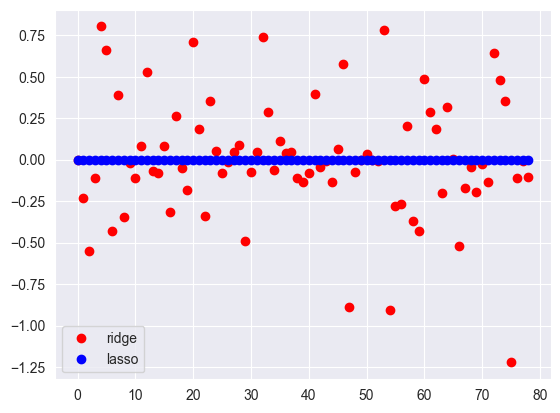

In [44]:
# put the column names and coeffecients together
plt.plot(ridge_coefs, 'ro', label = 'ridge')
plt.plot(lasso_coefs, 'bo', label = 'lasso')
plt.legend();

## Cliffsnotes: L.A.S.S.O.
LASSO is actually an acronym:

* **L**east
* **A**bsolute
* **S**hrinkage and
* **S**election
* **O**perator

**SHRINKAGE**: Higher $\alpha$ "shrinks" $\beta$ towards $\mathbf{0}$.

**SELECTION**: Higher $\alpha$ zeros out small $\beta$s.



## So, um, what was LASSO doing here?
If you're a really cool person, you might have noticed something fishy about our "penalty parameter" $\alpha$. We're doing an optimization problem, so actually, this $\alpha$ is a **Lagrange multiplier**. This means that optimizing our loss function:

$$ \|\mathbf{y} - \mathbf{X}\beta\|^2 + \alpha\|\beta\|_1 $$

is equivalent to optimizing the **constrained loss function**:

$$ \|\mathbf{y} - \mathbf{X}\beta\|^2 \quad \text{such that} \quad \|\beta\|_1 \le t $$



# Elephant in the Room: Categorical Variables
Think about it. What does it mean to scale a binary variable? How about a categorical variable dummified into several columns? What does it mean to shrink the coefficients associated with these columns? What happens if the LASSO zeros out one category, but not others? I don't know, either.

It turns out, it's not a great idea to combine scaling and categorical data. It often just doesn't make sense to do. This is true for all algorithms where we need to scale, including kNN. So what do we do? A few options:

* Set separate regularization parameters for each x-variable (not available in Scikit-Learn)
* Carry out the _grouped LASSO_ technique (not availabe in Scikit-Learn, and doesn't solve all problems anyway)
* Manually decide on a scale for these variables (time consuming, unintuitive, still doesn't work with regularization)
* Don't use those variables (but you want them!)
* Just do it anyway. Who knows, it'll probably be fine! (¯\_(ツ)_/¯)

## Important Notes
- The $\alpha$ hyperparameter for regularization is **unrelated** to significance level in hypothesis testing.
- In certain resources, including [ISLR](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), you'll see that $\lambda$ is used instead of $\alpha$ for regularization strength.
- We must standardize before regularizing, but regularization and standardization are not the same things!
- Ridge regression is sometimes called **weight decay**, but usually only when regularizing neural networks.
- LASSO regression is sometimes called **basis pursuit**, but that's very old fashioned.
- The y-intercept for these models are not regularized.

## Recap
- Regularization is used when evidence suggests our model is suffering from high error due to variance.
- Evidence to suggest our model suffers from high error due to variance includes substantially better performance on our training set than our testing set.
- LASSO tends to be "more brutal" than Ridge regularization in that it will zero out coefficients.
- If you want to combine LASSO and Ridge regularization, there is a technique called "ElasticNet" that does exactly this.

## ElasticNet Regression (bonus)

---

Can't decide?

![](./imgs/ridge-VS-lasso.jpg)

The Elastic Net combines the Ridge and Lasso penalties.  It adds *both* penalties to the loss function:

$$
\begin{eqnarray}
SSE + Ridge + Lasso &=& \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 + \alpha\left[\rho\sum_{j=1}^p |\beta_j| + (1-\rho)\sum_{j=1}^p \beta_j^2\right] \\
&=& \|\mathbf{y} - \mathbf{X}\beta\|^2 + \alpha\left(\rho\|\beta\|_1 + (1 - \rho)\|\beta\|^2\right)
\end{eqnarray}
$$


In the elastic net, the effect of the ridge versus the lasso is balanced by the $\rho$ parameter.  It is the ratio of Lasso penalty to Ridge penalty and must be between zero and one.

`ElasticNet` in sklearn has two parameters:
- `alpha`: the regularization strength.
- `l1_ratio`: the amount of L1 vs L2 penalty (i.e., $\rho$). An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.


In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

Calculate the coefficients with both alpha values and an l1_ratio of 0.05. Lasso can "overpower" the Ridge penalty in some datasets, and so rather than an equal balance I'm just adding a little bit of Lasso in.
- Using a $\rho$ value below 0.05 can empirically cause issues in `sklearn`.

In [ ]:
# Reminders
print(" OLS ".center(18, "="))
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
print()
print(" LASSO ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

In [ ]:
# Set up a list of alphas to check.


# Set up our l1 ratio. (What does this do?)


# Instantiate model.


# Fit model using optimal alpha.


# Generate predictions.


# Evaluate model.


In [ ]:
# Here is the optimal value of alpha.
